# Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

#### On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of 3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

#### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
#### b. What metric would you report for this dataset?
#### c. What is its value?

In [2]:
import pandas as pd

# Load Dataset

In [3]:
question1_dataset = pd.read_csv('question1_dataset.csv')
question1_dataset.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


# Quickly looking into the Data

## Verify there are no blank rows

In [4]:
question1_dataset.isnull().values.any()

False

## Sort Dataset to ensure all dates are within the 30 days range

In [5]:
question1_dataset = question1_dataset.sort_values(by="created_at")
question1_dataset.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 0:08:09
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25


In [6]:
question1_dataset.tail()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2765,2766,9,708,236,2,debit,2017-03-30 9:22:41
4890,4891,63,853,136,1,cash,2017-03-30 9:27:00
244,245,32,928,202,2,cash,2017-03-30 9:30:28
211,212,22,712,292,2,credit_card,2017-03-30 9:40:40
145,146,72,906,640,4,cash,2017-03-30 9:55:00


## Looking into data types and summary

In [7]:
question1_dataset.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [8]:
question1_dataset.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [9]:
question1_dataset.astype('object').describe()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
count,5000,5000,5000,5000,5000,5000,5000
unique,5000,100,301,258,8,3,4991
top,5000,53,718,153,2,credit_card,2017-03-28 4:00:00
freq,1,68,28,87,1832,1735,3


<AxesSubplot:>

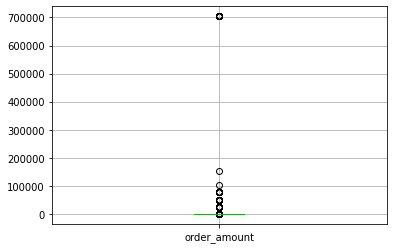

In [27]:
question1_dataset.boxplot(column='order_amount')

# a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

#### Notes: How is 3145.13 calculated?

In [11]:
#Order Sum
orderAmountSum = question1_dataset['order_amount'].sum()
orderAmountSum

15725640

In [14]:
#Total # of rows
totalItemsRowCount = question1_dataset['total_items'].count()
totalItemsRowCount

5000

In [15]:
incorrectAOV = orderAmountSum / totalItemsRowCount
incorrectAOV = str(round(incorrectAOV, 2))
incorrectAOV

'3145.13'

The incorrect calculation is found by dividing by the total number of rows. The AOV is typically calculated by dividing the sum of sales by the sum of items sold (the mean). In addition, we can derive great information from the mode and median of the order amount column. 

# b. What metric would you report for this dataset?

As a metric is a single value, of the mean, mode and median.  I would report the mode. Although, I believe it is important to consider all 3 values and there relation to each others price point. As the mean can be skewed, due to outliers in pricing as within this dataset. This price point does not always represent the data set as a whole. However, the mode represents the most common price point for items bought from a store. This allows us to see the best holistic view.

# c. What is its value?

In [16]:
totalItemsSum = question1_dataset['total_items'].sum()
totalItemsSum

43936

In [17]:
AOV = orderAmountSum / totalItemsSum
AOV = str(round(AOV, 2))
AOV

'357.92'

In [23]:
median = question1_dataset['order_amount'].median()
median

284.0

In [24]:
mode = question1_dataset['order_amount'].mode()[0]
mode

153